Welcome to ExoTiC-UVIS Stage 0! In this Stage, we will:

1. Download data for a given program ID, target, and visit number.
2. Automatically organize and make human-readable the downloaded products from MAST.
3. Locate the source star in the direct image, for calibration.
4. ``Quicklook'' the data to assess its quality and decide whether a HOPR is needed.

To get started, run the next cell, which imports the packages we need and creates a directory for ExoTiC-UVIS to operate from. Then follow the next markdown cell for instructions on how to execute Stage 0.

In [5]:
import os
from exotic_uvis import run_pipeline

config_directory = 'hustle_config'
if not os.path.exists(config_directory):
    os.makedirs(config_directory)

THE STAGE 0 .HUSTLE FILE

ExoTiC-UVIS operates using configuration files, designated with the .hustle file extension. Each .hustle file controls one Stage of ExoTiC-UVIS. .hustle files are more human-readable that raw code and they allow you to easily reproduce previous runs of ExoTiC-UVIS as well as rapidly sharing your reduction and analysis methods with your colleagues.

Now we need to make our Stage 0 .hustle file. The next cell contains a template stage_0.hustle file which you can modify to run Stage 0 of ExoTiC-UVIS. We're going to modify it so that it downloads the HUSTLE program observations of the hot Jupiter WASP-127b. To make it do this, make the following changes to the .hustle file template:

1. Define 'toplevel_dir' to be 'tutorial'. Generally, this variable defines a local path where all of the inputs and outputs for your analysis will be stored.
2. Set the verbose, show_plots, and save_plots variables to each be 0, 1, or 2. verbose controls how many printed statements the pipeline produces, letting you keep track of what the pipeline is doing and what step it is on. show_plots allows the pipeline to temporarily pause execution to show you an interactive plot. save_plots saves output .png or .gif files for plots and other graphics produced. 0 prints/shows/saves nothing, while 2 prints/shows/saves everything.
3. Set do_download to True, since we are downloading files. If you have already been given data, such as from a collaborator through Box or Drive, you would set do_download to False and point ExoTiC-UVIS to your data folder with the filesfrom_dir variable.
4. Set programID to the string '17183' and target name to the string 'WASP-127'.
5. Set the extensions variable. If you want to download all available data, set this value to None. You really only need the _flt and _spt .fits files from MAST, so you can filter out all other files by setting this variable to the list ['_flt.fits','_spt.fits'] to only select these file extensions.
6. Set do_organize to True. This variable allows you to sort files into useful directories and assigns more readable filenames to each file. Unless you have pre-downloaded data that has already been sorted (e.g. direct images separated from spectroscopic images), I would recommend always running this step.
7. Set visit_number to the string '12', since WASP-127b was visit 12 in this program.
8. Set do_locate to True and location to None. When do_locate is True, ExoTiC-UVIS will execute a step that requires your interaction. It will show you an interactive plot of the direct image. Use this interactive plot to locate the target star's x and y coordinates, getting as close to the centroid as you can. The target star is usually the brightest star in the frame and tends to be found near x = 970, y = 170. Once you close the plot, ExoTiC-UVIS will ask you to supply the x, y coordinates of the target star, and then will provide you with possible more precise locations of the source. Select the x, y coordinates closest to those you found while examining the interactive plot.
9. Set do_quicklook to True. This prompts ExoTiC-UVIS to create a simple .gif showing you the data you downloaded, which can be helpful in determining whether the data needs to be re-taken.

 As you modify each variable, take a moment to read the comment to its right. These comments tell you what each variable does and what else you can do with them.

In [6]:
hustle_stage_0_file = f"""
# ExoTiC-UVIS config file for launching Stage 0: Data Handling

# Setup for Stage 0
toplevel_dir    './files'                                   # Directory where you want your files to be stored after Stage 0 has run. This is where /specimages, /directimages, /visitfiles, and /miscfiles will be stored.
verbose         2                                           # Int from 0 to 2. 0 = print nothing. 1 = print some statements. 2 = print every action.
show_plots      2                                           # Int from 0 to 2. 0 = show nothing. 1 = show some plots. 2 = show all plots.
save_plots      2                                           # Int from 0 to 2. 0 = save nothing. 1 = save some plots. 2 = save all plots.

# Step 1: Download files from MAST
do_download     True                                        # Bool. Whether to perform this step.
programID       '12345'                                     # ID of the observing program you want to query data from. On MAST, referred to as "proposal_ID".
target_name     'PLANET-B'                                  # Name of the target object you want to query data from. On MAST, referred to as "target_name".
extensions      ['_flt.fits','_spt.fits']                   # lst of str or None. File extensions you want to download. If None, take all file extensions. Otherwise, take only the files specified. _flt.fits, _spt.fits recommended as minimum working case.

# Step 2: Organizing files
do_organize     True                                        # Bool. Whether to perform this step.
visit_number    '00'                                        # The visit number you want to operate on.
filesfrom_dir   None                                        # None or str. If you downloaded data in Step 1, leave this as None. If you have pre-downloaded data, please place all of it in filesfrom_dir. Don't sort it into sub-folders; ExoTiC-UVIS won't be able to find them if they are inside sub-folders!

# Step 3: Locating the target star
do_locate       True                                        # Bool. Whether to perform this step.
location        None                                        # None or tuple of float. Prior to running Stage 0, this will be None. After running Stage 0, a copy of this .hustle file will be made with this information included.

# Step 4: Quality quicklook
do_quicklook    True                                        # Bool. Whether to perform this step.

# ENDPARSE
"""

# Now we write the contents of the config file out to a .hustle file.
with open(os.path.join(config_directory,'stage_0_input_config.hustle'), 'w') as f:
    f.write(hustle_stage_0_file)

In [7]:
hustle_stage_0_file = f"""
# ExoTiC-UVIS config file for launching Stage 0: Data Handling

# Setup for Stage 0
toplevel_dir    'tutorial'                                   # Directory where you want your files to be stored after Stage 0 has run. This is where /specimages, /directimages, /visitfiles, and /miscfiles will be stored.
verbose         2                                           # Int from 0 to 2. 0 = print nothing. 1 = print some statements. 2 = print every action.
show_plots      0                                           # Int from 0 to 2. 0 = show nothing. 1 = show some plots. 2 = show all plots.
save_plots      1                                           # Int from 0 to 2. 0 = save nothing. 1 = save some plots. 2 = save all plots.

# Step 1: Download files from MAST
do_download     True                                        # Bool. Whether to perform this step.
programID       '17183'                                     # ID of the observing program you want to query data from. On MAST, referred to as "proposal_ID".
target_name     'WASP-127'                                  # Name of the target object you want to query data from. On MAST, referred to as "target_name".
extensions      ['_flt.fits','_spt.fits']                   # lst of str or None. File extensions you want to download. If None, take all file extensions. Otherwise, take only the files specified. _flt.fits, _spt.fits recommended as minimum working case.

# Step 2: Organizing files
do_organize     True                                        # Bool. Whether to perform this step.
visit_number    '12'                                        # The visit number you want to operate on.
filesfrom_dir   None                                        # None or str. If you downloaded data in Step 1, leave this as None. If you have pre-downloaded data, please place all of it in filesfrom_dir. Don't sort it into sub-folders; ExoTiC-UVIS won't be able to find them if they are inside sub-folders!

# Step 3: Locating the target star
do_locate       True                                        # Bool. Whether to perform this step.
location        None                                        # None or tuple of float. Prior to running Stage 0, this will be None. After running Stage 0, a copy of this .hustle file will be made with this information included.

# Step 4: Quality quicklook
do_quicklook    True                                        # Bool. Whether to perform this step.

# ENDPARSE
"""

with open(os.path.join(config_directory,'stage_0_input_config.hustle'), 'w') as f:
    f.write(hustle_stage_0_file)

Now that our config file is ready, simply use the cell below to execute Stage 0 of the pipeline!

This is the only Stage of the pipeline that requires user input. Please stick around while this step is executing - it should only take ~3 to 5 minutes if your bandwidth is decent.

Querying MAST for files under program ID 17183, target WASP-127...
Found 169 files related to program ID 17183, target WASP-127.
Creating directory tutorial to store your files in...
Downloaded data will be stored in directory tutorial.
Examining 251 queried data products for files in visit number 12...


2024-11-15 13:53:53,635 - stpipe - INFO - Found cached file tutorial/iexr12f6q_spt.fits with expected size 103680.
2024-11-15 13:53:53,757 - stpipe - INFO - Found cached file tutorial/iexr12f6q_spt.fits with expected size 103680.


INFO: Found cached file tutorial/iexr12f6q_spt.fits with expected size 103680. [astroquery.query]
INFO: Found cached file tutorial/iexr12f6q_spt.fits with expected size 103680. [astroquery.query]


2024-11-15 13:53:54,477 - stpipe - INFO - Found cached file tutorial/iexr12f6q_flt.fits with expected size 12758400.
2024-11-15 13:53:54,591 - stpipe - INFO - Found cached file tutorial/iexr12f6q_flt.fits with expected size 12758400.


INFO: Found cached file tutorial/iexr12f6q_flt.fits with expected size 12758400. [astroquery.query]
INFO: Found cached file tutorial/iexr12f6q_flt.fits with expected size 12758400. [astroquery.query]
Skipping over file at mast:HST/product/hst_17183_12_wfc3_uvis_g280_iexr12g8_flt.fits...
Skipping over file at mast:HST/product/hst_17183_12_wfc3_uvis_g280_iexr12ii_flt.fits...
Skipping over file at mast:HST/product/hst_17183_12_wfc3_uvis_g280_iexr12fg_flt.fits...
Skipping over file at mast:HST/product/hst_17183_12_wfc3_uvis_g280_iexr12hq_flt.fits...
Skipping over file at mast:HST/product/hst_17183_12_wfc3_uvis_g280_iexr12gp_flt.fits...
Skipping over file at mast:HST/product/hst_17183_12_wfc3_uvis_g280_iexr12go_flt.fits...
Skipping over file at mast:HST/product/hst_17183_12_wfc3_uvis_g280_iexr12g5_flt.fits...
Skipping over file at mast:HST/product/hst_17183_12_wfc3_uvis_g280_iexr12hb_flt.fits...
Skipping over file at mast:HST/product/hst_17183_12_wfc3_uvis_g280_iexr12hn_flt.fits...
Skipping

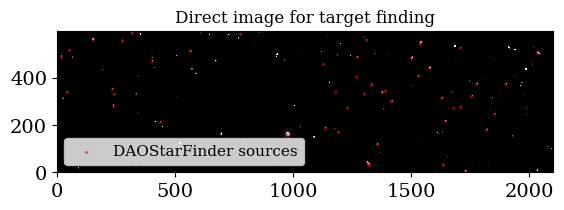

Located 1 possible sources.
Please select the source from this list:
0     (974.8154829702696, 160.15959819737947)


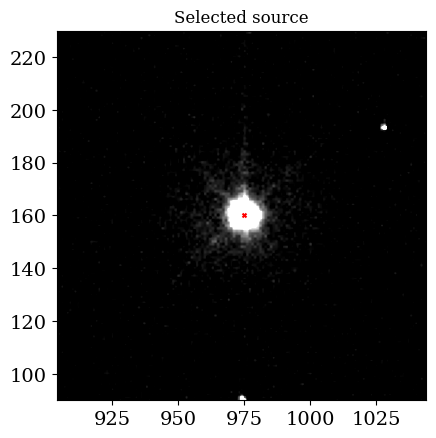

Source selected: 974.8154829702696 160.15959819737947


Parsing files for quicklookup... Progress:: 100%|██████████| 158/158 [00:03<00:00, 48.03it/s]
2024-11-15 13:56:15,993 - stpipe - WARNING - MovieWriter ffmpeg unavailable; using Pillow instead.


Writing config file for Stage 0...
Config file written.


In [8]:
run_pipeline(config_files_dir=config_directory,
             stages=(0,))

You made it! I hope there were no problems with execution. Now let's check out the outputs!

You should now see a new directory has opened up with the name 'tutorial' as assigned by the 'toplevel_dir' variable. Check to make sure it has these contents:
- directimages folder containing or01dr001_flt.fits and or01dr001_spt.fits
- specimages folder containing 158 files, which are an equal number of flt and spt files spanning 5 orbits with 15 frames in the first orbit and 16 frames in every orbit after that
- visitfiles folder which is empty
- miscfiles folder which contains 5 spt.fits files
- outputs/stage0 folder with a .hustle file in it and a quicklook gif

The stage0 folder will contain a copy of the config file you wrote above. The only change to this file is that it has now been updated to contain the direct image source location you found during the locate step. This file will be useful to us in Stage 1, so make sure to hang onto it. The filetree structure will also be useful so do not move or rename any of these folders, please.

That's all there is to Stage 0! You can execute this Stage for any G280 time series observation as long as you know the program ID, target name, and visit number of the object you want to study. In the next tutorial notebook, we'll cover Stage 1, which reduces the data that we just downloaded.